## Библиотеки

In [5]:
import numpy as np
import pandas as pd
from itertools import *
from more_itertools import *
from sympy import *
from scipy.special import *
import math
from fractions import Fraction
from scipy.stats import *
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# 1
Две монеты подбрасывается до тех пор, пока одновременно не выпадут
два герба. Найдите: a) математическое ожидание и дисперсию числа брос-
ков; б) медиану распределения числа бросков. Разыграйте эксперимент
на Python и найдите среднее значение числа бросков. Постройте график
зависимости среднего значения числа бросков от числа экспериментов.

## Кодом

In [18]:
rv = geom(1/4)
rv.expect(), rv.var(), rv.median()

(3.9999999999999925, 12.0, 3.0)

## График

In [34]:
N = 50_000
x = np.arange(1, N+1)
y = []

X = rv_discrete(name="X", values=([0, 1], [1/2, 1/2]))
Y = rv_discrete(name="X", values=([0, 1], [1/2, 1/2]))
for n in tqdm(range(1, N+1)):
    i = 2
    f, s = X.rvs(size=1)[0], Y.rvs(size=1)[0]
    while f != 1 and s != 1:
        i += 2
        f, s = X.rvs(size=1)[0], Y.rvs(size=1)[0]
    
    y.append(i)

  0%|          | 0/50000 [00:00<?, ?it/s]

In [35]:
np.array(y).mean()

2.67356

In [ ]:
N = 10_000
x = np.arange(1, N+1)
y_exp = []
y_var = []
y_med = []

rv = geom(1/2)
for n in tqdm(range(1, N+1)):
    x_ = rv.rvs(size=n)

    y_exp.append(x_.mean())
    y_var.append(((x_ - x_.mean()) ** 2).sum() / n)
    y_med.append(np.median(x_))

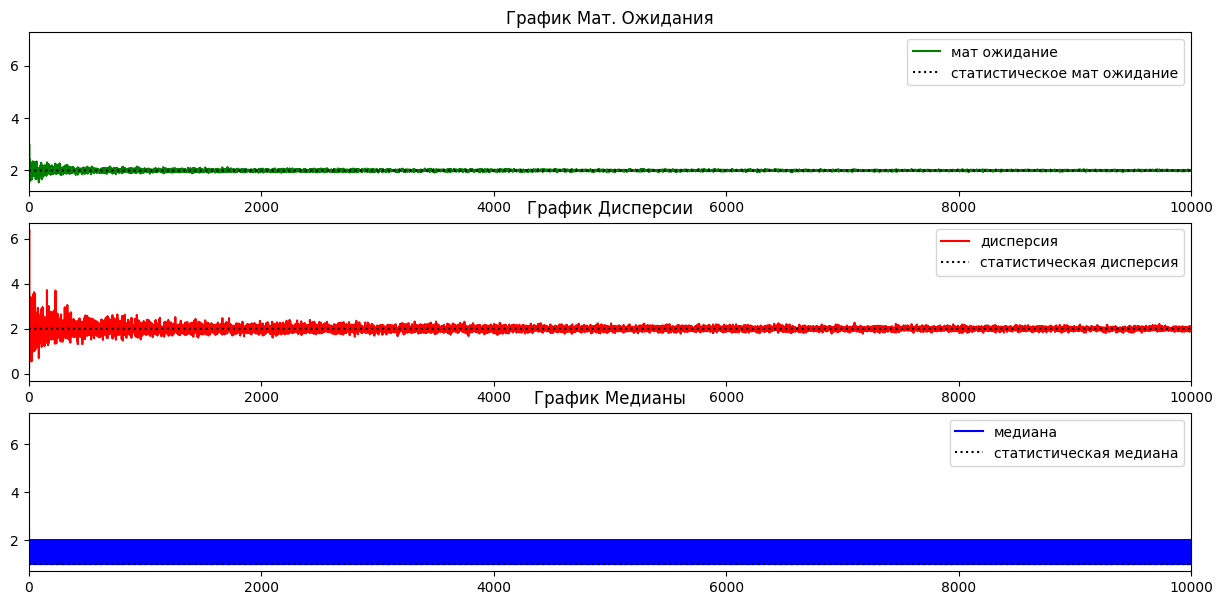

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(15, 7))

ax[0].plot(x, y_exp, label="мат ожидание", color="green")
ax[1].plot(x, y_var, label="дисперсия", color="red")
ax[2].plot(x, y_med, label="медиана", color="blue")

ax[0].plot(x, [2] * len(y_exp), label="статистическое мат ожидание", color="black", linestyle="dotted")
ax[1].plot(x, [2] * len(y_exp), label="статистическая дисперсия", color="black", linestyle="dotted")
ax[2].plot(x, [1] * len(y_exp), label="статистическая медиана", color="black", linestyle="dotted")

ax[0].set_title("График Мат. Ожидания")
ax[1].set_title("График Дисперсии")
ax[2].set_title("График Медианы")

for i in [0, 1, 2]:
    ax[i].set_xlim(0, N)
    ax[i].legend()

# 2

Две игральные (симметричные) кости бросаются до тех пор, пока сум-
ма очков в последнем броске не окажется более 10. Найдите математи-
чеcкое ожидание и дисперсию числа бросков. Постройте график зависи-
мости среднего значения числа бросков от числа экспериментов.

## Кодом

In [63]:
from itertools import product
p = Fraction(0)
for i, j in product(range(1, 6+1), repeat=2):
    if i + j > 10:
        p += Fraction(1, 36)
p

Fraction(1, 12)

In [64]:
rv = geom(1/12)
rv.expect(), rv.var()

(11.999999999850935, 132.0)

## График

In [43]:
N = 10_000
x = np.arange(1, N+1)
y = []

X = rv_discrete(name="C", values=(list(range(1, 6+1)), [1/6 for _ in range(6)]))
for n in tqdm(range(1, N+1)):
    i = 1
    q, w = X.rvs(size=2)
    while q + w <= 10:
        i += 1
        q, w = X.rvs(size=2)
    y.append(i)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [44]:
np.array(y).mean()

11.8107

In [46]:
y = np.array(y)

((y - y.mean()) ** 2).sum() / y.size

130.76486551

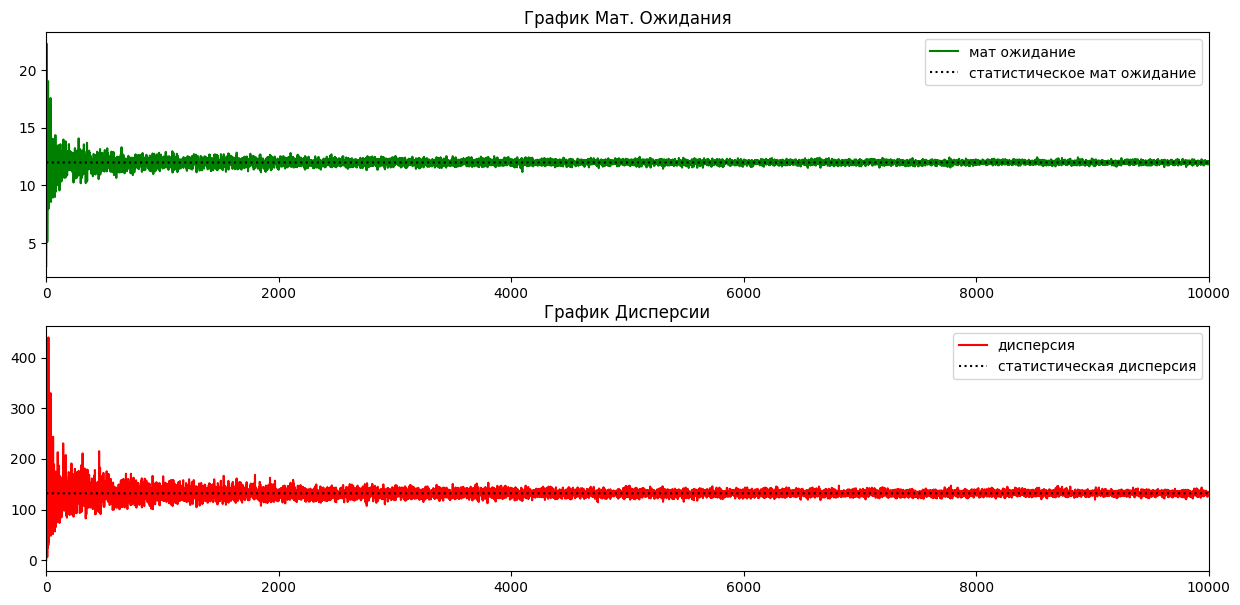

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(15, 7))

ax[0].plot(x, y_exp, label="мат ожидание", color="green")
ax[1].plot(x, y_var, label="дисперсия", color="red")

ax[0].plot(x, [12] * len(y_exp), label="статистическое мат ожидание", color="black", linestyle="dotted")
ax[1].plot(x, [132] * len(y_exp), label="статистическая дисперсия", color="black", linestyle="dotted")

ax[0].set_title("График Мат. Ожидания")
ax[1].set_title("График Дисперсии")

for i in [0, 1]:
    ax[i].set_xlim(0, N)
    ax[i].legend()

# 3

Предположим, что игральная кость не является симметричной и массы в
ней распределены так, что масса каждой грани пропорциональна её номе-
ру. Несимметричная игральная кость бросается до тех пор, пока не выпа-
дут все чётные цифры. Найдите математичеcкое ожидание и дисперсию
числа бросков. Постройте график зависимости среднего значения числа
бросков от числа экспериментов.

## Аналитика

Пусть $X$ число бросаний до выпадения всех четных граней. Представим $X$:   
$X = X_2 + X_4 + X_6$, где $X_i$ - число бросаний до выпадения $i$-й грани. То  

$X_k \sim Geom(p_k = \frac{k}{6} \cdot \frac{2}{7})$  

$\mathbb E(X) = \mathbb E(X_2) + \mathbb E(X_4) + \mathbb E(X_6) = \frac{1}{\frac{2}{6} \cdot \frac{2}{7}} + \frac{1}{\frac{4}{6} \cdot \frac{2}{7}} + \frac{1}{\frac{6}{6} \cdot \frac{2}{7}} = \frac{42}{4} + \frac{42}{8} + \frac{42}{12} = 19.25$   
тк независимы:
$Var(X) = Var(X_2) + Var(X_4) + Var(X_6) = \frac{399}{4} + \frac{357}{16} + \frac{35}{4} = 130.8125$

In [17]:
s = 0
for k in [2, 4, 6]:
    p = Fraction(k, 6) * Fraction(2, 7)
    s += (1 - p) / p ** 2
s

Fraction(2093, 16)

In [18]:
2093/16

130.8125

## Кодом

## Стохастический

In [48]:
N = 10_000
x = np.arange(1, N+1)
y = []

X = rv_discrete(name="C", values=(list(range(1, 6+1)), [i/6 * 2/7 for i in range(1, 6+1)]))
for n in tqdm(range(1, N+1)):
    i = 1
    x_ = [X.rvs(size=1)]
    while not(2 in x_ and 4 in x_ and 6 in x_):
        x_.append(X.rvs(size=1))
    y.append(len(x_))


  0%|          | 0/10000 [00:00<?, ?it/s]

In [49]:
np.array(y).mean()

12.7325

In [50]:
y = np.array(y)

((y - y.mean()) ** 2).sum() / y.size

84.02974375

# 4

Найдите $\mu_2(X), \mu_3(X), \mu_4(X), As(X) Ex(X)$ для случайной величины $X$, распределенной по закону:

|X|0|1|2|3|
|:-:|:-:|:-:|:-:|:-:|
|$\mathbb P(X)$| 0,4 | 0,3 | 0,2 | 0,1|

## Кодом

In [53]:
xk = [0, 1, 2, 3]
X = rv_discrete(name="X", values=(xk, [0.4, 0.3, 0.2, 0.1]))

In [55]:
X.expect()

1.0

In [4]:
X.moment(2, loc=X.expect())
X.moment(3, loc=X.expect())
X.moment(4, loc=X.expect())

47.00000000000001

In [7]:
X.moment(2) - X.moment(1) ** 2

1.0

In [8]:
X.moment(3) - 3 * X.moment(1) * X.moment(2) + 2 * X.moment(1) ** 3

0.6000000000000005

In [9]:
X.moment(4) - 4 * X.moment(1) * X.moment(3) + 6 * X.moment(1) ** 2 * X.moment(2) - 3 * X.moment(1) ** 4

2.1999999999999975

In [13]:
X.moment(4) - 4 * X.moment(1) * X.moment(3) + 6 * X.moment(1) ** 2 * X.moment(2) - 3 * X.moment(1) ** 4 / (X.var() ** 0.5) ** 3 

2.1999999999999975

In [22]:
skew(X.rvs(size=1_000_000))

0.6002448746832305

In [23]:
kurtosis(X.rvs(size=1_000_000))

-0.8023440041070757

(array([2.6682    , 0.        , 0.        , 0.        , 0.        ,
        0.        , 2.00426667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.32193333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.67226667]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
        1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85, 3.  ]),
 <BarContainer object of 20 artists>)

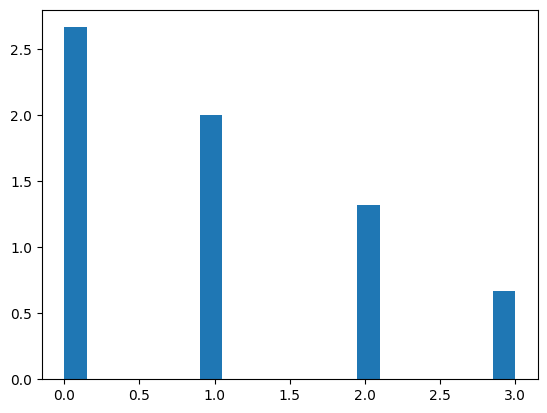

In [59]:
plt.hist(X.rvs(size=100_000), density=True, bins=20)

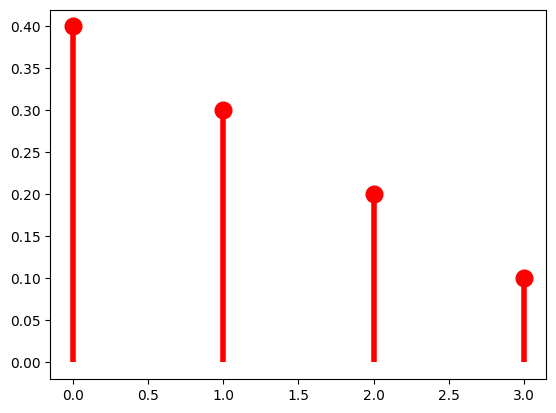

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(xk, X.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, X.pmf(xk), colors='r', lw=4)
plt.show()

# 5

Нестандартная игральная кость отличается от стандартной только тем,
что вместо 6 очков на одной из её граней выбито 3 очка (в результате име-
ются две грани с таким числом очков). Нестандартная игральная кость
подбрасывается 24 раза, $S$ – сумма выпавших очков. Найдите $As(S)$ и $Ex(S)$.

## Кодом

In [61]:
X = rv_discrete(name="X", values=([1, 2, 3, 4, 5], [1/6, 1/6, 2/6, 1/6, 1/6]))

(array([9.81481481e-05, 1.11666667e-03, 1.09296296e-02, 3.20722222e-02,
        5.41407407e-02, 5.80055556e-02, 2.22222222e-02, 6.04444444e-03,
        5.27777778e-04, 2.77777778e-05]),
 array([ 46. ,  51.4,  56.8,  62.2,  67.6,  73. ,  78.4,  83.8,  89.2,
         94.6, 100. ]),
 <BarContainer object of 10 artists>)

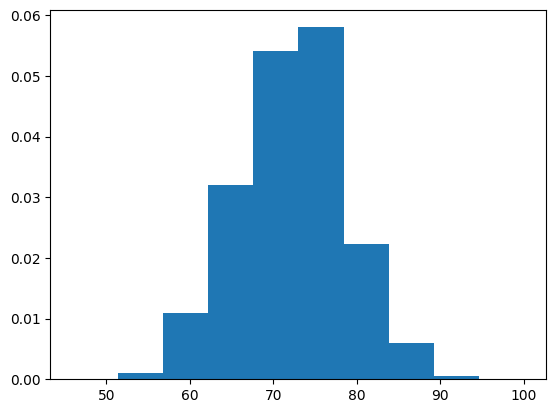

In [68]:
plt.hist(np.array([X.rvs(size=24).sum() for _ in range(100_000)]), density=True)

In [63]:
S = [X.rvs(size=24).sum() for _ in range(100_000)]

In [64]:
kurtosis(S)

-0.030040975864450647

In [65]:
skew(S)

-0.002086106789781812

# 6

Случайные величины $X_1, \ldots , X_{100}$ независимы и принимают только значения $a$ и $b$. Найдите $As(X_1 + \ldots + X_{100})$ и $Ex(X_1 + \ldots + X_{100})$, если известно,
что $a < b$ и $P(X_i = b) = 0,2$ для $i = 1, \ldots, 100$.

## Аналитика
тк распределения одинаковые:   
$As(X_1 + \ldots + X_{100})$ и $Ex(X_1 + \ldots + X_{100}) = \frac{1}{10} As(X_1) = 0$  
$As(X_1) = \frac{\mu_3(X_1)}{\sigma(X_1)^3} = 0$   

$\mu_3(X_1) = \sum_{i=0}^{+ \infty}(x_i - \mathbb E[X_1])^3 \mathbb P(X=x_i) = (a - (0.8a + 0.2b))^3 \cdot 0.8 + (b - (0.8a + 0.2b))^3 \cdot 0.2 = \frac{-12a^3 + 36a^2b - 36ab^2 + 12b^3}{125}$   


$\sigma(X_1) = \sqrt{Var(X_1)} = \sqrt{\mathbb E(X^2) - \mathbb E(X)^2} = a^2 \cdot 0.8 + b^2 \cdot 0.2 - (a \cdot 0.8 + b \cdot 0.2)^2 = 0.16 a^2 + 0.16 b^2 - 0.32 ab$

# 7

Случайная величина $X$ распределена по закону Пуассона с параметром $\lambda$.
Найдите $As(X)$

## Аналитика



$As(X) = \frac{\mu_3(X)}{\sigma(X)^3} = \sqrt{2} \lambda$

$\mu_3(X) = $

# 11

Пусть $X$ обозначает число бросаний до выпадения всех граней.
Представим $X$ в виде суммы шести независимых случайных величин
$X = X_1 + X_2 + X_3 + X_4 + X_5 + X_6$.
Здесь $X_1$ – число бросаний до появления какой-либо из граней (какой— все
равно).

$p_k = \frac{6-(k-1)}{6}, X_k \sim Geom(p_k = \frac{7-k}{6})$  

$\mathbb E(X_k) = \frac{1}{p_k} = \frac{6}{6-k(k-1)}$

$\mathbb E(X) = 14,7$  

$Var(X) = 38,99$

# 12

# *

In [51]:
X = rv_discrete(name="C", values=(list(range(1, 6+1)), [i/6 * 2/7 for i in range(1, 6+1)]))

In [52]:
N = 10_000
x = np.arange(1, N+1)
y = []

X = rv_discrete(name="C", values=(list(range(1, 6+1)), [i/6 * 2/7 for i in range(1, 6+1)]))
# for n in tqdm(range(1, N+1)):
#     i = 1
#     x_ = [X.rvs(size=1)]
#     while not(2 in x_ or 4 in x_ or 6 in x_):
#         x_.append(X.rvs(size=1))
    
X.pmf(2)

0.09523809523809523